# Data Cleaning from Botometer

In [1]:
import pandas as panditasbb
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
botwiki = panditasbb.read_json('../bot_detector/Data_botometer/botwiki-2019_tweets.json')
verified = panditasbb.read_json('../bot_detector/Data_botometer/verified-2019_tweets.json')

In [3]:
botwiki

,created_at,user
0,2019-06-05 21:43:20+00:00,"{'id': 969398693249126400, 'id_str': '96939869..."
1,2019-04-02 13:26:02+00:00,"{'id': 2402022649, 'id_str': '2402022649', 'na..."
2,2019-06-05 20:22:03+00:00,"{'id': 2976541239, 'id_str': '2976541239', 'na..."
3,2019-06-05 18:56:21+00:00,"{'id': 4425828741, 'id_str': '4425828741', 'na..."
4,2019-06-05 20:54:02+00:00,"{'id': 817082622824169472, 'id_str': '81708262..."
...,...,...
693,2019-06-05 22:38:09+00:00,"{'id': 925657497238507520, 'id_str': '92565749..."
694,2019-06-05 21:18:54+00:00,"{'id': 772202703212703744, 'id_str': '77220270..."
695,2019-06-05 20:30:02+00:00,"{'id': 709947590268157952, 'id_str': '70994759..."
696,2019-05-03 20:17:32+00:00,"{'id': 993674729830612992, 'id_str': '99367472..."


In [4]:
verified

,created_at,user
0,2019-06-05 20:09:15+00:00,"{'id': 31098240, 'id_str': '31098240', 'name':..."
1,2019-06-05 22:40:04+00:00,"{'id': 6892002, 'id_str': '6892002', 'name': '..."
2,2019-06-04 22:04:21+00:00,"{'id': 20083388, 'id_str': '20083388', 'name':..."
3,2019-06-05 10:58:25+00:00,"{'id': 385587235, 'id_str': '385587235', 'name..."
4,2019-06-05 18:21:32+00:00,"{'id': 51240839, 'id_str': '51240839', 'name':..."
...,...,...
1982,2019-06-05 12:26:47+00:00,"{'id': 76235237, 'id_str': '76235237', 'name':..."
1983,2019-06-05 22:07:56+00:00,"{'id': 2159329092, 'id_str': '2159329092', 'na..."
1984,2019-06-05 14:16:01+00:00,"{'id': 25527618, 'id_str': '25527618', 'name':..."
1985,2019-06-05 16:33:33+00:00,"{'id': 43654274, 'id_str': '43654274', 'name':..."


In [10]:
bot_wiki = panditasbb.DataFrame(list(botwiki['user']))

In [6]:
verified_df = panditasbb.DataFrame(list(verified['user']))

In [7]:
bot_wiki.info()
"""
['default_profile',
 'default_profile_image',
 'favourites_count',
 'followers_count',
 'friends_count',
 'geo_enabled',
 'statuses_count',
 'verified',
 'average_tweets_per_day',
 'account_age_days']
"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  698 non-null    int64 
 1   id_str                              698 non-null    object
 2   name                                698 non-null    object
 3   screen_name                         698 non-null    object
 4   location                            698 non-null    object
 5   description                         698 non-null    object
 6   url                                 382 non-null    object
 7   entities                            698 non-null    object
 8   protected                           698 non-null    bool  
 9   followers_count                     698 non-null    int64 
 10  friends_count                       698 non-null    int64 
 11  listed_count                        698 non-null    int64 

"\n['default_profile',\n 'default_profile_image',\n 'favourites_count',\n 'followers_count',\n 'friends_count',\n 'geo_enabled',\n 'statuses_count',\n 'verified',\n 'average_tweets_per_day',\n 'account_age_days',\n 'Bot_or_Not']\n"

In [16]:
bot_columns = list(bot_wiki.columns)
unwanted = ['default_profile',
 'default_profile_image',
 'favourites_count',
 'followers_count',
 'friends_count',
 'geo_enabled',
 'statuses_count',
 'verified']
cols_to_remove= [ele for ele in bot_columns if ele not in unwanted]

cols_to_remove
# bot_wiki.drop(columns=['id','id_str','name','screen_name','location','description','url','entities','protected','listed_count','created_at','utc_offset','time_zone','lang','contributors_enabled','is_translator','is_translation_enabled','profile_background_color','profile_background_image_url','profile_background_image_url_https','profile_background_tile','profile_image_url','profile_image_url_https','profile_banner_url','profile_link_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_text_color','profile_use_background_image','has_extended_profile','following','follow_request_sent','notifications','translator_type'], inplace=True)

['id',
 'id_str',
 'name',
 'screen_name',
 'location',
 'description',
 'url',
 'entities',
 'protected',
 'listed_count',
 'created_at',
 'utc_offset',
 'time_zone',
 'lang',
 'contributors_enabled',
 'is_translator',
 'is_translation_enabled',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'has_extended_profile',
 'following',
 'follow_request_sent',
 'notifications',
 'translator_type']

In [17]:
bot_wiki.drop(columns=cols_to_remove, inplace=True)

In [19]:
verified_df.drop(columns=cols_to_remove, inplace=True)

In [18]:
bot_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   followers_count        698 non-null    int64
 1   friends_count          698 non-null    int64
 2   favourites_count       698 non-null    int64
 3   geo_enabled            698 non-null    bool 
 4   verified               698 non-null    bool 
 5   statuses_count         698 non-null    int64
 6   default_profile        698 non-null    bool 
 7   default_profile_image  698 non-null    bool 
dtypes: bool(4), int64(4)
memory usage: 24.7 KB


In [20]:
verified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   followers_count        1987 non-null   int64
 1   friends_count          1987 non-null   int64
 2   favourites_count       1987 non-null   int64
 3   geo_enabled            1987 non-null   bool 
 4   verified               1987 non-null   bool 
 5   statuses_count         1987 non-null   int64
 6   default_profile        1987 non-null   bool 
 7   default_profile_image  1987 non-null   bool 
dtypes: bool(4), int64(4)
memory usage: 70.0 KB


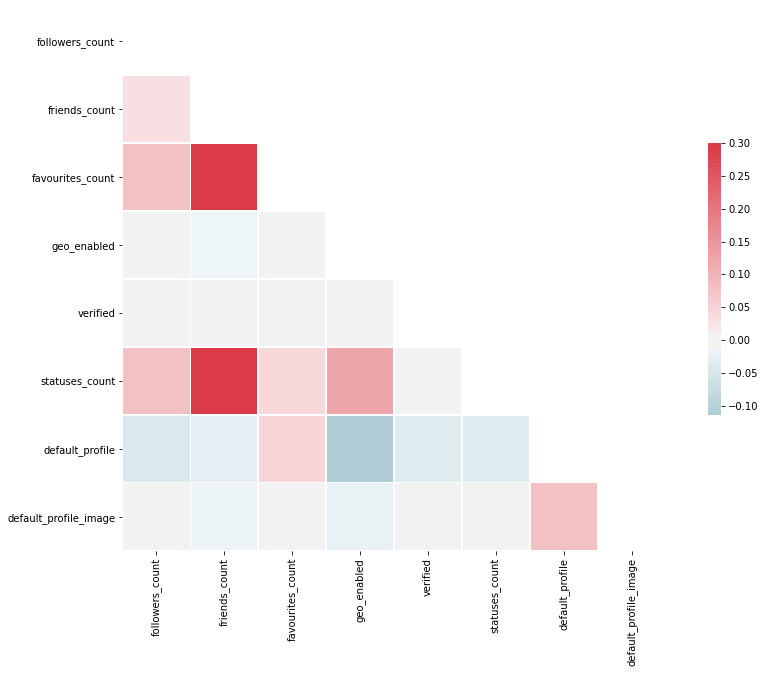

In [21]:
corr=bot_wiki.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [22]:
bot_wiki.shape

(698, 8)

In [23]:
verified_df.shape

(1987, 8)

In [24]:
bot_wiki.head(5)

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,23,8,2,False,False,3792,False,False
1,322,8,34,False,False,407226,False,False
2,171,86,1933,False,False,15668,True,False
3,3374,9,15,False,False,5087,True,False
4,7,2,1,False,False,2813,False,False


In [25]:
verified_df.head(5)

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,188419,857,628,False,True,117922,False,False
1,180759,905,11608,True,True,176250,False,False
2,19311,1472,0,False,True,34918,False,False
3,398,185,12798,False,True,669,False,False
4,7125,4431,2135,True,True,16341,False,False


In [26]:
bot_wiki.replace(to_replace=[False, True], value=[0,1], inplace=True)

In [27]:
verified_df.replace(to_replace=[False, True], value=[0,1], inplace=True)

In [28]:
bot_wiki

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,23,8,2,0,0,3792,0,0
1,322,8,34,0,0,407226,0,0
2,171,86,1933,0,0,15668,1,0
3,3374,9,15,0,0,5087,1,0
4,7,2,1,0,0,2813,0,0
...,...,...,...,...,...,...,...,...
693,14,1,0,0,0,2014,1,0
694,186,15,38,0,0,2846,0,0
695,406,1,6,0,0,6916,1,0
696,11,1,67,0,0,522,1,0


In [29]:
verified_df

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,188419,857,628,0,1,117922,0,0
1,180759,905,11608,1,1,176250,0,0
2,19311,1472,0,0,1,34918,0,0
3,398,185,12798,0,1,669,0,0
4,7125,4431,2135,1,1,16341,0,0
...,...,...,...,...,...,...,...,...
1982,3020,790,1707,0,1,4671,0,0
1983,4074,4239,4777,1,1,712,0,0
1984,17014,2610,7765,1,1,17452,0,0
1985,367516,20245,10282,1,1,158301,0,0


In [30]:
botometer_to_test = panditasbb.concat([bot_wiki, verified_df], ignore_index=True)

In [31]:
botometer_to_test

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,23,8,2,0,0,3792,0,0
1,322,8,34,0,0,407226,0,0
2,171,86,1933,0,0,15668,1,0
3,3374,9,15,0,0,5087,1,0
4,7,2,1,0,0,2813,0,0
...,...,...,...,...,...,...,...,...
2680,3020,790,1707,0,1,4671,0,0
2681,4074,4239,4777,1,1,712,0,0
2682,17014,2610,7765,1,1,17452,0,0
2683,367516,20245,10282,1,1,158301,0,0


In [32]:
botometer_to_test.to_csv('botometer_to_test.csv', index=False)